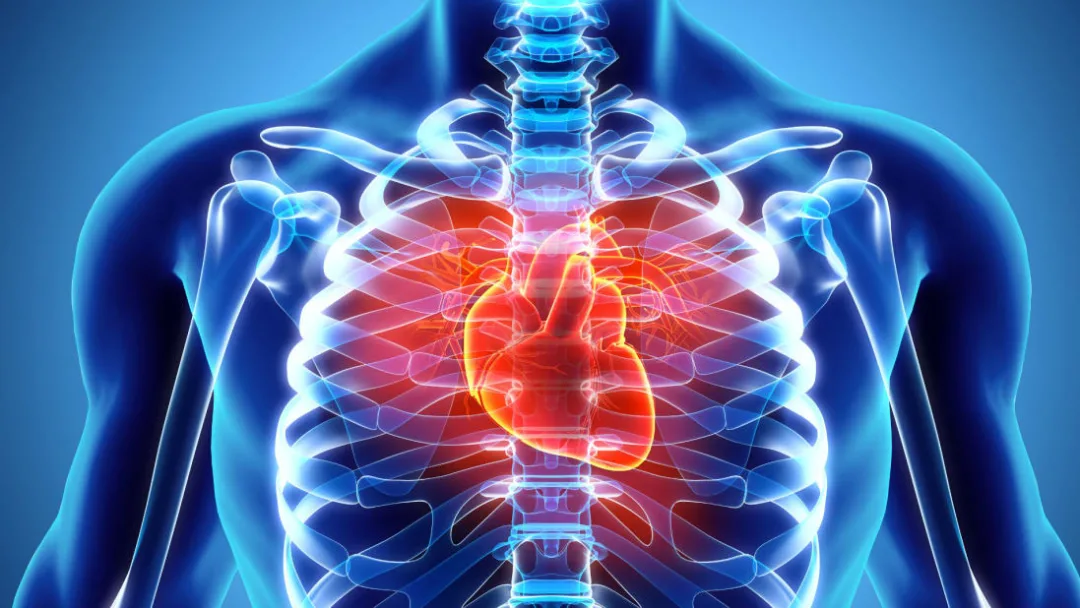

<a id="1"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">About Data 
</h1>


# Title: Heart Disease Prediction

`Author:` [Muhammad Abdullah](https://www.linkedin.com/in/muhammad-abdullah-6b84b4297/)\
`Date:` 04.Jan.2024\
`Dataset:` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## <span style="color: yellow; font-size: 150%; font-weight: bold;">Aims and Objective</span>
1. First we Perform EDA to get Knowledge About Dataset . 
2. Preprocess data For ML 
3. Use Random Forest  and XGB Classifier For Training Model

<h1 style="background-color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>


* [1. About Data](#1)
   * [1.1 Import Library](#1a)
   * [1.2 Load Data](#1b)
* [2. EDA (Exploratiry Data Analysis)](#2)
   * [2.1 Outputs](#2a)
* [3. Missing Values Dealing](#3)
* [4. Outliers Dealing](#4)
* [5. Machine Learning](#5)
    * [5.1 Data Preparation](#5a)
    * [5.2 Random Forest](#5b)
    * [5.3 Xgb Classifier](#5c)



<a id="1a"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [38]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

<a id="1b"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Load Data</h3>

In [39]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv')

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<a id="2"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">EDA (Exploratary Data Analysis) </h1>

- **Age Columns**

In [40]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [41]:
# data shpae
df.shape

(920, 16)

In [42]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [43]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

In [44]:
# let's summarie the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

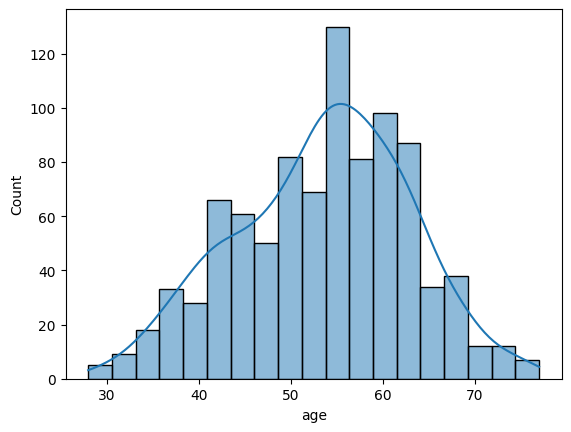

In [45]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


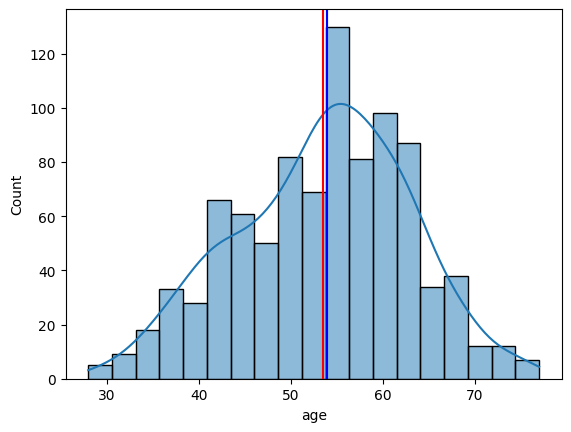

In [46]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

- **Let's explore the gender based distribution of the dataset for age column.**

In [47]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [48]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [49]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [50]:
# Plot Same Plot Using Plotly and Coloring this by sex
fig = px.pie(df, names='sex', color='sex')
fig.show()

In [51]:
# find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

- **Dataset Column**

In [52]:
# Lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [53]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [54]:
# plot the countplot of dataset column
# sns.countplot(data=df, x='dataset', hue = 'sex')

# better plots with plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [55]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")


Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


- **Let's explore cp (Chest Pain) column:** 

 **Types of Chest pain :**

    1. Asymptomatic: No chest pain or discomfort.
    2. Non-Anginal: Chest pain not typical of heart-related issues; requires further investigation.
    3. Atypical Angina: Chest pain with characteristics different from typical heart-related chest pain.
    4. Typical Angina: Classic chest pain indicating potential insufficient blood supply to the heart.

In [56]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [57]:
cp_num = pd.crosstab(df.cp,df.num)
cp_num

num,0,1,2,3,4
cp,,,,,
asymptomatic,104,197,89,83,23
atypical angina,150,19,2,3,0
non-anginal,131,37,14,18,4
typical angina,26,12,4,3,1


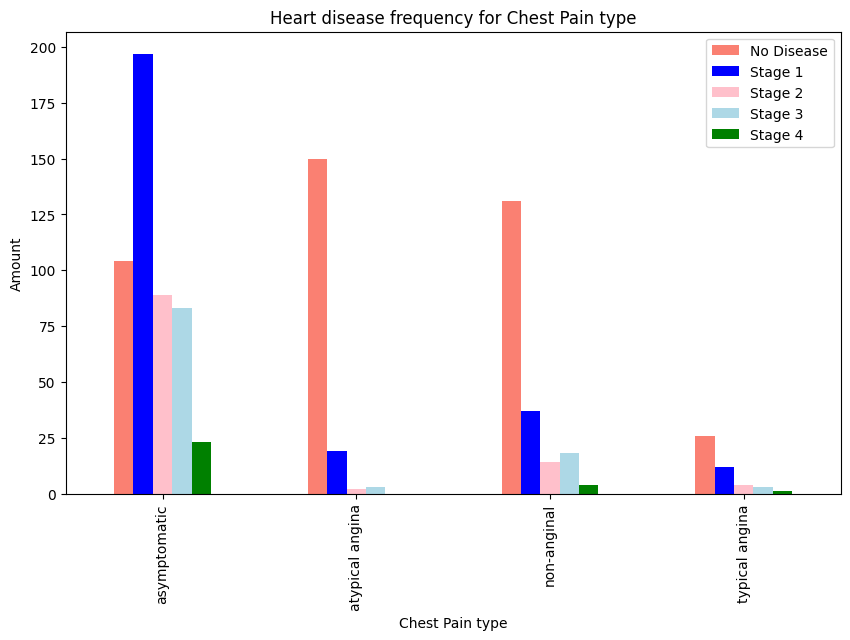

In [58]:
# Add Some Helpful info
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(10,6), 
                               color = ['salmon','blue','pink','lightblue','green'])
plt.title('Heart disease frequency for Chest Pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])

In [59]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='cp', color='sex')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

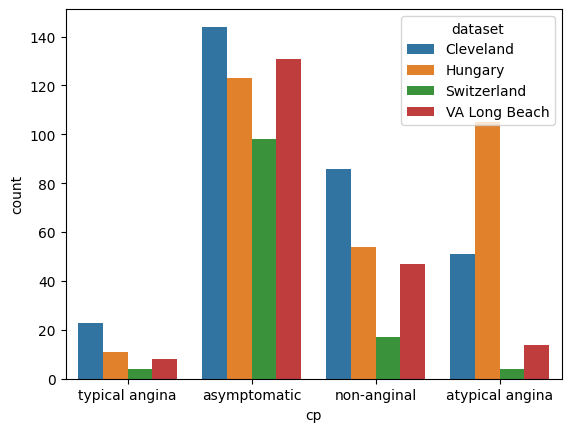

In [60]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [61]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

In [62]:
# draw the plot of cp column grouped by num column using plotly
fig = px.histogram(data_frame=df, x='cp', color='num')
fig.show()

- **Let'e explore the trestbps (resting blood pressure) column:**

The normal resting blood pressure is 120/80 mm Hg.

high blood pressure increasing the risk of heart disease and stroke, often asymptomatic, while low blood pressure can lead to dizziness and fainting

In [63]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [64]:
# Plotting Resting Blood Pressure vs Disease
fig = go.Figure()
fig.add_trace(go.Box(y=df['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=df[df['num']== 0]['trestbps'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[df['num'] !=0]['trestbps'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

<Axes: xlabel='trestbps', ylabel='Count'>

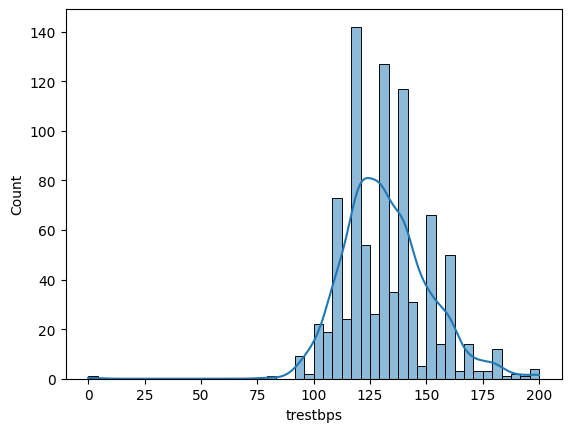

In [65]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

- **Lets Explore the chol Column**

What is the chol :  a fatty substance essential for body function, but elevated levels can contribute to heart disease.

In [66]:
# First we Describe Chol
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [67]:
# Cross Tab of chol and num
cross = pd.crosstab(df['chol'], df['num']).describe()
cross

num,0,1,2,3,4
count,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1.806452,1.188940,0.493088,0.488479,0.124424
std,2.015990,4.268345,3.152189,2.619568,0.507538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000
max,20.000000,62.000000,46.000000,38.000000,6.000000


<Axes: ylabel='chol'>

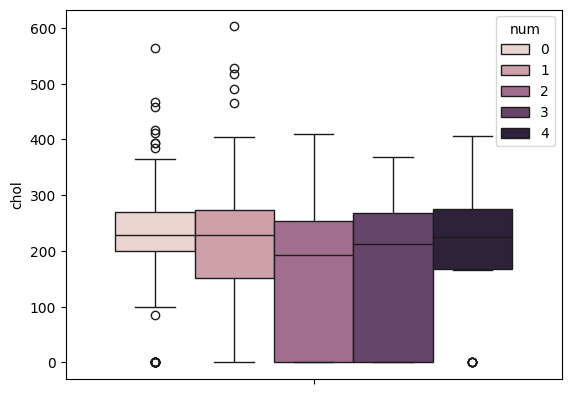

In [68]:
sns.boxplot(y=df['chol'], hue=df['num'])

In [69]:
# draw the plot of chol column grouped by num column using plotly
fig = go.Figure()
fig.add_trace(go.Violin(y=df['chol'].values , name='All Patient', marker_color = 'green'))
fig.add_trace(go.Violin(y=df[df['num']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=df[df['num'] == 4]['chol'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level', title_x = 0.5 )
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

- **Lets Explore Thal ( Thalesmia)**

    Normal: Within expected or healthy parameters.

    Reversible Defect: An abnormality that can potentially be corrected or improved.

    Fixed Defect: An abnormality that is unlikely to change or be corrected.

In [70]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [71]:
# Group by thal by sex
df.groupby('thal')['sex'].value_counts()

thal               sex   
fixed defect       Male       42
                   Female      4
normal             Male      110
                   Female     86
reversable defect  Male      171
                   Female     21
Name: count, dtype: int64

In [72]:
# Groupby Thal by Dataset
df.groupby('thal')['dataset'].value_counts()

thal               dataset      
fixed defect       Cleveland         18
                   Hungary           10
                   Switzerland       10
                   VA Long Beach      8
normal             Cleveland        166
                   Switzerland       19
                   Hungary            7
                   VA Long Beach      4
reversable defect  Cleveland        117
                   Switzerland       42
                   VA Long Beach     22
                   Hungary           11
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

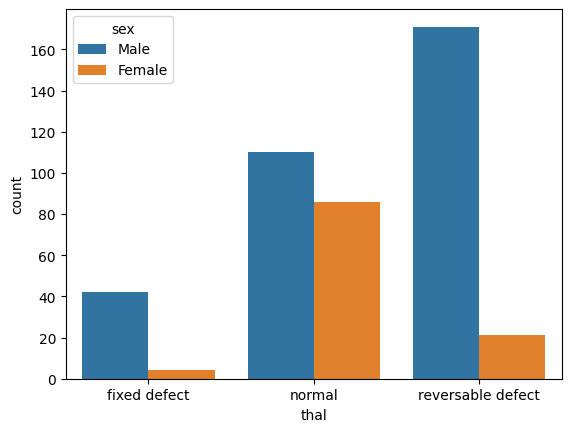

In [73]:
# count plot of cp column by dataset column
sns.countplot(df, x='thal', hue='sex')

In [74]:
# draw the plot of thal column grouped by age column using plotly
fig = px.histogram(data_frame=df, x='age', color='thal')
fig.show()

In [75]:
# draw the plot of thal column grouped by age column using plotly
fig = px.histogram(data_frame=df, x='thal', color='dataset')
fig.show()

<Axes: xlabel='thal', ylabel='count'>

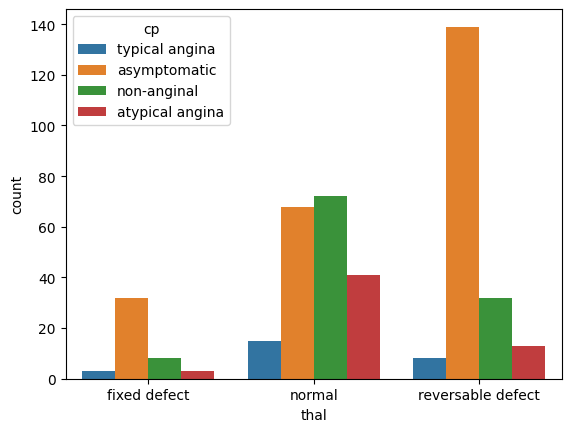

In [76]:
# Plot or groupby to check the people who have thal does the have cp 
df.groupby('thal')['cp'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal', hue='cp')

<Axes: xlabel='thal', ylabel='count'>

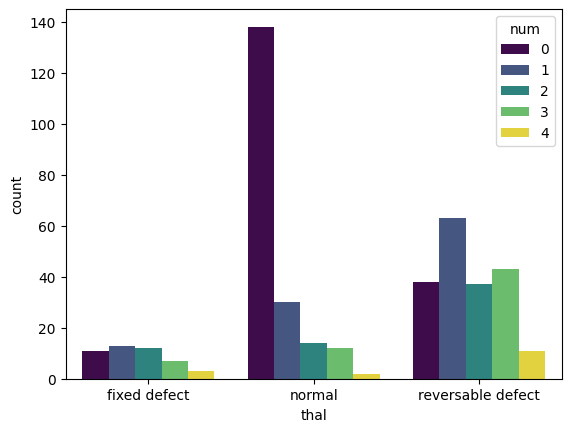

In [77]:
# Now Check People with Thal Survive or Not 
df.groupby('thal')['num'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal', hue='num' , palette='viridis')

- **Lets Deal With Num , The Target Variable**
   * `0 = no heart disease`
   * `1 = mild heart disease`
   * `2 = moderate heart disease `
   * `3 = severe heart disease`
   * `4 = critical heart disease `


In [78]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

<Axes: xlabel='num', ylabel='count'>

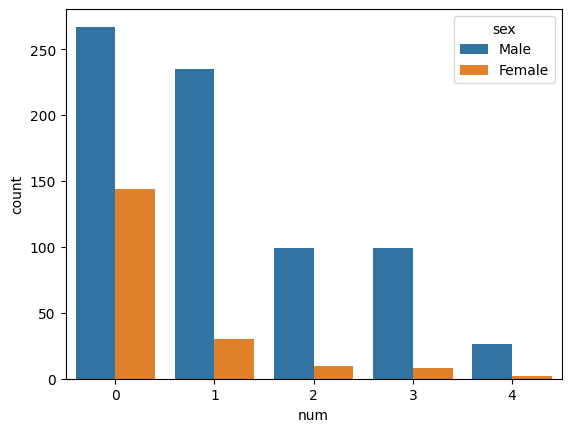

In [79]:
# Groupby num with sex 
df.groupby('num')['sex'].value_counts()
# Plot to Visualize
sns.countplot(df, x='num', hue='sex')

<Axes: xlabel='age', ylabel='Count'>

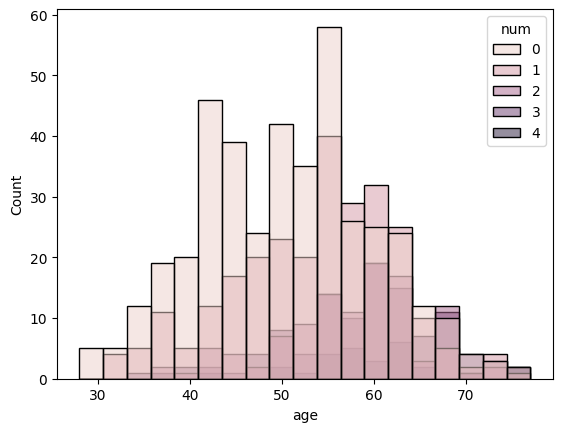

In [80]:
# groupby num by age 
df.groupby('num')['age'].value_counts()
# Plot to Visualize
sns.histplot(df, x='age', hue='num')

In [81]:
# Make Histplot using Plotly 
px.histogram(data_frame=df, x='age', color='num')

<a id="2a"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Outputs</h3>
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91%
5. Female Percentage in the data: 21.09%
6. Males are 274.23% more than females in the data.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
   1. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).
---
8. Observations :
   1. The Mean Age according to the dataset is : 
   
      Cleveland        54.351974
      
      Hungary          47.894198

      Switzerland      55.317073

      VA Long Beach    59.350000
      
   2. The Median Age according to the dataset is :
      
      Cleveland        55.5
      
      Hungary          49.0
      
      Switzerland      56.0
      
      VA Long Beach    60.0

   3. The Mode Age according to the dataset is :
      
      Cleveland              58
      
      Hungary                54
      
      Switzerland            61
      
      VA Long Beach    [62, 63]
 ---     
9.  Chest Pain Output :
    
   * `0 = no heart disease`
   * `1 = mild heart disease`
   * `2 = moderate heart disease `
   * `3 = severe heart disease`
   * `4 = critical heart disease `
      1. A total of 104 individuals are identified as having neither chest pain nor heart disease.

      2. Only 23 individuals are found to have no chest pain while experiencing critical heart disease.

      3. A group of 83 individuals is observed to be free from chest pain while having severe heart disease.

      4. In the dataset, 197 individuals are noted for having no chest pain and exhibiting mild heart disease.

      5. Among the individuals, 89 have no chest pain while presenting with moderate heart disease.
    Results According to Group by cp and Num : 
   [cp               num 

   asymptomatic     1      (197) | 0      (104) | 2       (89) | 3       (83) | 4       (23)

   atypical angina  0      (150) | 1       (19) | 3        (3) | 2        (2)

   non-anginal      0      (131) | 1       (37) | 3       (18) | 2       (14) | 4        (4)

   typical angina   0       (26) | 1       (12) | 2        (4) | 3        (3) | 4        (1)  ]

From Above out 0,1,2,3,4 Show Diseases Level adn Next Their Values 

---     

10. Missing Values Imputation :
    So Here we impute missing Values by using Iterative Imputer  and Random Forest . In this Dataset some Columns Have Higher Missing Values Ratio , so we have to Used Advance methods to impute missing Values . We Define a FUnction for Iputing Missing Values , In Which We Passed the Columns Names and The FUnction Return a Dataset With no Missing Values .

      Methods : 
      1. Random Forest Classifier 
      2. Random Forest Regressor
      3. Iterative Imputer 
--- 
11.  Outliers : 
    While Dealing with Outliers , from my Observations There is only One Outlier in the dataset which i removed . Other Values Have some Meaningfull Insight , so we Cannot remove them . Leave them in the Dataset .
---
12.   Thal Output :
      - Normal: Within expected or healthy parameters.
      - Reversible Defect: An abnormality that can potentially be corrected or improved.
      - Fixed Defect: An abnormality that is unlikely to change or be corrected.
  
      1. Among the individuals, 110 males and 86 females are classified as normal.
      2. A total of 42 males and 4 females exhibit a fixed defect.
      3. In the dataset, 171 males and 21 females are identified with a reversible defect.
       The higher ratio of males compared to females is attributed to the dataset's male predominance.
      4. The incidence of fixed defects is higher in individuals from Cleveland, while VA Long Beach demonstrates a lower occurrence of fixed defects.
      5. Both individuals with thalassemia and those with normal thalassemia experience chest pain.
      6. Individuals with normal thalassemia often exhibit a higher ratio of being free from heart disease, although some may still experience heart-related conditions.
      7. Those with thalassemia generally have an increased likelihood of heart disease, yet some individuals with thalassemia do not develop such health issues.
---
13.  Num : 
    1. Men exhibit a higher ratio of being disease-free, while females show a lower ratio in the dataset.

    2. Conversely, based on the dataset, men are more affected by diseases compared to women.


<a id="3"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Dealing Missing Values </h1>

**We are going to make a function to deal with missing values.**
- Here i Define a Function for Imputing Null Value , In Which I Just Passed the Column name the Function Run and impute the Null Values in it. \n
  The Mthods used for Imputation are `Random Forest Classifier` , `Random Forest Regression` and `Iterative Imputer` 

In [82]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [83]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [84]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [85]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [86]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [87]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.288843930635837 

RMSE = 17.107519777804637 

R2 = 0.08619843249569248 

Missing Values chol : 3.26%


MAE = 45.29938202247192 

RMSE = 63.64742320264882 

R2 = 0.6790921824621299 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.935086705202316 

RMSE = 21.84799070138628 

R2 = 0.3059155445639221 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5663081395348837 

RMSE = 0.7901746973458347 

R2 = 0.4051544961512167 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [88]:
# Again CHecking Missing Values 
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- Here we are Done With Imputing Missing Values , By using Advance Methods Like Random Forest and Iterative Imputer . Which Are More Accurate then using Mean , Median or Mode  We Define a FUnction for Iputing Missing Values , In Which We Passed the Columns Names and The FUnction Return a Dataset With no Missing Values .
- 
      MEthods : 
      1. Random Forest Classifier 
      2. Random Forest Regressor
      3. Iterative Imputer 

<a id="4"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Outliers </h1>


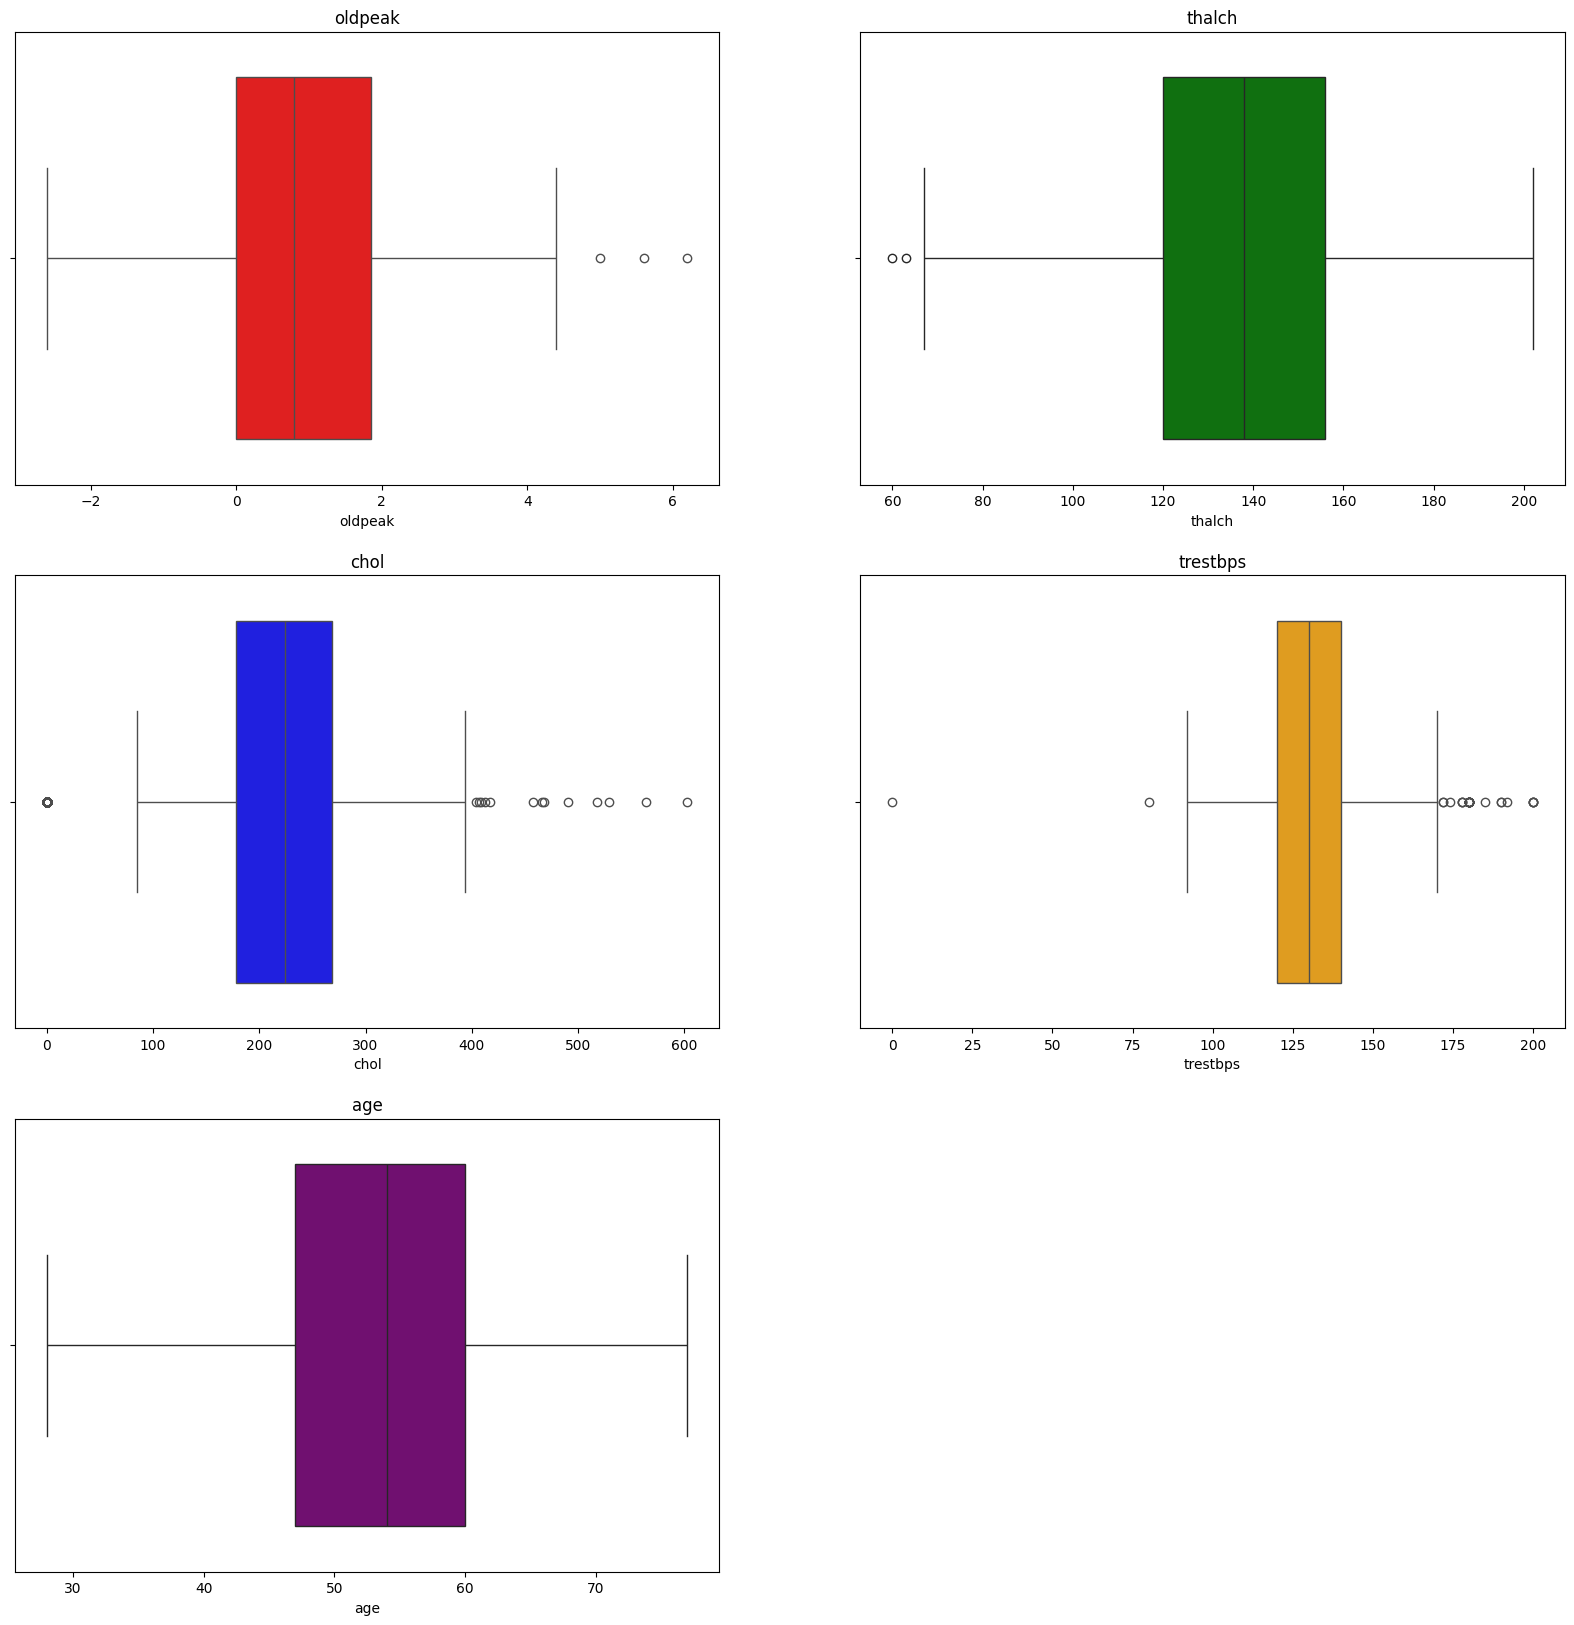

In [89]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [90]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [91]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [92]:
# Saving The Cleaned Data 
df.to_csv('heart_disease_cleaned.csv', index=False)

- While Dealing with Outliers , from my Observations There is only One Outlier in the dataset which i removed . Other Values Have some Meaningfull Insight , so we Cannot remove them . Leave them in the Dataset .


<a id="5"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Machine Learning </h1>


 The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. 
 The unique values in this column are: [0, 1].
* `0 = no heart disease`
* `1 = heart disease`


The models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. Random Forest
2. XGB Classifier

- Import Libraries

In [93]:
# Import Libraires 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Train test Split 
from sklearn.model_selection import train_test_split
# Models 
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBClassifier , XGBRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor , GradientBoostingClassifier
from sklearn.svm import SVC , SVR
from xgboost import XGBClassifier , XGBRegressor
# Import Naive Bayes
#metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score , classification_report , accuracy_score , f1_score , precision_score
#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
# import preprocessors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import QuantileTransformer , PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Remove Warning 
import warnings
warnings.filterwarnings('ignore')
# Saving Model 
import pickle

<a id="5a"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Process</h3>

- Renaming ColumnNames and Droping Some Irrelevant Column
- Here we Drop some irrelevant columns Like : `id ,restecg` and Uses those columns Which are Important . 
- in Thal and cp we have space which i think will create problem later on so we also remove those spaces . 
- in target Column 0 : 'No disease' and 1 : 'Effected Disease' . Here in target Column , i do some changes , before there are 5 different categories . 1,2,3,4, Represent Disease , soo i make a new column  in which , there are only two categories one represents Disease and one represents no disease . 
data_1['target'] = ((data['num'] > 0)*1).copy()

[ (data['sex'] == 'Male')*1 ]: The boolean values (True/False) are then multiplied by 1. In Python, True is equivalent to 1 and False is equivalent to 0 when used in arithmetic operations. This operation effectively converts the boolean values into numerical values (1 for 'Male' and 0 for 'Female').

In [94]:
# Load Again The Clean Data 
data = pd.read_csv('heart_disease_cleaned.csv')

In [95]:
# In some of the features, there is space will will create problem later on. 
# So we rename those attributes to handle problems in the future.
data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = data[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((data['num'] > 0)*1).copy()
# Encoding Sex 
data_1['sex'] = (data['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (data['fbs'])*1
data_1['exang'] = (data['exang'])*1
# Renaming COlumns Names.
data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
# Load Data Sample 
data_1.sample(5)

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
652,56,1,non-anginal,Switzerland,120.0,0.0,0,97.0,0,0.0,flat,0.0,reversable_defect,0
504,46,1,asymptomatic,Hungary,110.0,202.0,0,150.0,1,0.0,flat,0.0,reversable_defect,1
494,35,1,atypical_angina,Hungary,110.0,257.0,0,140.0,0,0.0,flat,0.0,fixed_defect,1
703,64,1,asymptomatic,Switzerland,110.0,0.0,0,114.0,1,1.3,downsloping,1.0,reversable_defect,1
795,49,1,typical_angina,VA Long Beach,130.0,0.0,0,145.0,0,3.0,flat,0.0,reversable_defect,1


<a id="5b"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Random Forest Split</h3>

Random Forest is an ensemble learning technique used for both classification and regression tasks. It builds multiple decision trees during training and merges their predictions to improve accuracy and reduce overfitting.

1. High Accuracy
2. Robust to Overfitting
3. Handles Missing Values

Random Forest is a versatile and powerful algorithm, especially effective in scenarios with high-dimensional data and complex relationships. It excels in situations where high accuracy is crucial, and its ability to handle missing values and resist overfitting makes it a popular choice in machine learning applications.

In [96]:
def train_random_forest(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # encode X data using separate label encoder for all categorical columns and save it for inverse transform
    # Task: Separate Encoder for all cat and object columns and inverse transform at the end

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
        else:
            pass

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Scaling Data 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy on Test Set: {accuracy:.2f}')

    return best_rf_model, best_params , accuracy



In [97]:
accuracy , best_params , best_rf_model  = train_random_forest(data_1, 'target')

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy on Test Set: 0.86


<a id="5c"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">XGB Classifier </h3>

In [98]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # encode X data using separate label encoder for all categorical columns and save it for inverse transform
    # Task: Separate Encoder for all cat and object columns and inverse transform at the end

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
        else:
            pass

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Scaling Data 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on Test Set: {accuracy:.2f}')


    return best_xgb_model, best_params

In [99]:
train_xgb_classifier(data_1,'target')

Best Hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy on Test Set: 0.87


(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=2, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...),
 {'colsample_bytree': 1.0,
  'gamma': 2,
  'learning_rate': 0.2,
  'max_depth': 3,
  'n_estimators': 50,
  'subsample': 0.8})